In [2]:
import pandas as pd
import numpy as np


In [5]:
# Clean and organize the extracted text into a dataframe
data = {
    "Time (min)": [0, 10, 20, 30, 40, 50, 60, 70],
    "Volume of NaOH Used (mL)": [7.8, 13.8, 15.1, 13.2, 13.8, 13.0, 13.2, 13.2],
    "Volume of sample used (mL)": [10, 10, 10, 10, 10, 10, 10, 10],
    "Normality of NaOH used (N)": [0.077, 0.077, 0.077, 0.077, 0.077, 0.077, 0.077, 0.077],
    "Normality of Acetic Acid (N)": [0.060, 0.106, 0.116, 0.102, 0.106, 0.100, 0.102, 0.102],
    "Concentration of Acetic Acid (g/L)": [3.600, 6.360, 6.960, 6.120, 6.360, 6.000, 6.120, 6.120]
}

df = pd.DataFrame(data)

# Save the dataframe to an Excel file
excel_path = "Acetic_Acid_Titration_Data.xlsx"
df.to_excel(excel_path, index=False)

excel_path


'Acetic_Acid_Titration_Data.xlsx'

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Provided data
# Provided data
t = np.array([10, 20, 30, 40, 50, 60, 70])
water_flowrate = 10 / 60  # lph converted to lpm
org_flowrate = 10 / 60  # lph converted to lpm


conc_oxalic = 0.1  # N
vol_oxalic = 10  # ml
vol_naoh_std = 13  # ml
conc_naoh = conc_oxalic * vol_oxalic / vol_naoh_std  # N
print(f'The concentration of NaOH used in the titration is {conc_naoh} N')



The concentration of NaOH used in the titration is 0.07692307692307693 N


In [10]:

# Titration of acetic acid in aqueous phase with NaOH
vol_naoh_aq = np.array([13.8, 15.1, 13.2, 13.8, 13.0, 13.2, 13.2])  # (from provided data)
vol_aa_aq = 10  # 10 ml sample taken for titration
conc_aa_aq = conc_naoh * vol_naoh_aq / vol_aa_aq  # (from provided data)
print(f'The normality of acetic acid in the aqueous phase at various time points was {conc_aa_aq} N')
print(f'The concentration of acetic acid in the aqueous phase at various time points was {conc_aa_aq*60} N')


The normality of acetic acid in the aqueous phase at various time points was [0.10615385 0.11615385 0.10153846 0.10615385 0.1        0.10153846
 0.10153846] N
The concentration of acetic acid in the aqueous phase at various time points was [6.36923077 6.96923077 6.09230769 6.36923077 6.         6.09230769
 6.09230769] N


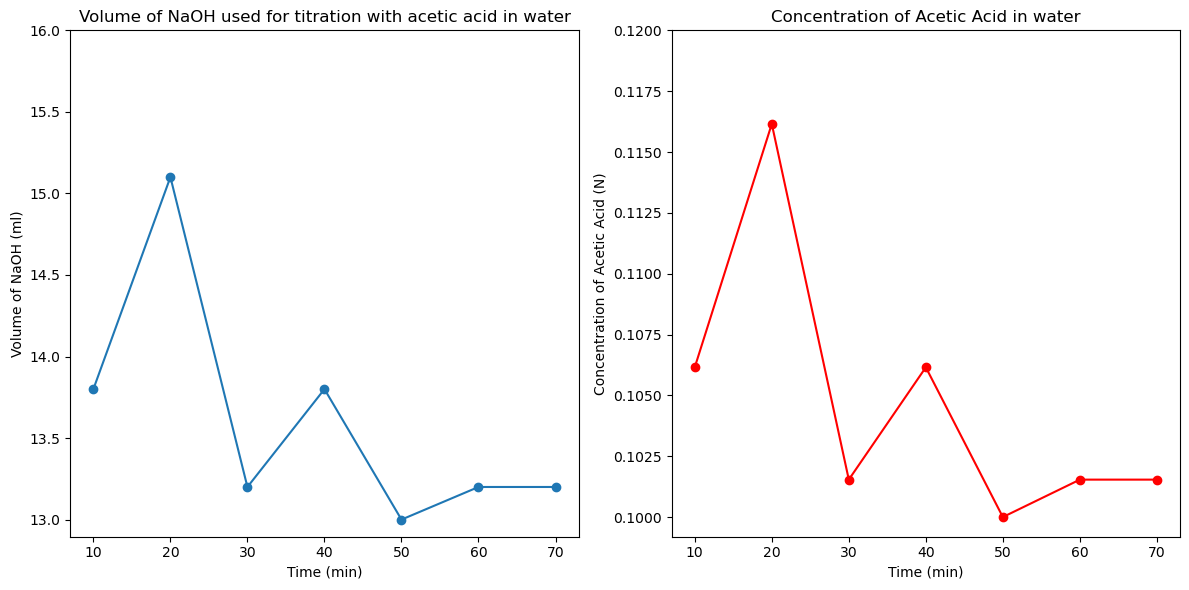

In [8]:

# Plotting the data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t, vol_naoh_aq, marker='o')
plt.xlabel('Time (min)')
plt.ylabel('Volume of NaOH (ml)')
plt.ylim(top=16)
plt.title('Volume of NaOH used for titration with acetic acid in water')

plt.subplot(1, 2, 2)
plt.plot(t, conc_aa_aq, marker='o', color='red')
plt.xlabel('Time (min)')
plt.ylabel('Concentration of Acetic Acid (N)')
plt.ylim(top=0.12)
plt.title('Concentration of Acetic Acid in water')

plt.tight_layout()
plt.show()

In [9]:

rho_aa = 1.05  # g/ml
mol_mass_aa = 60.05  # g/mol
dilution_factor = 300 / 50

conc_aa_org_initial = 100 / 10 * 1.05  # g/L; because 100 ml acetic acid in 10 l MIBK
vol_naoh_org_final = 3.6  # ml
vol_aa_org_final = 50  # ml
conc_aa_org_final = vol_naoh_org_final * conc_naoh / vol_aa_org_final * dilution_factor * mol_mass_aa  # g/L

print(f'The initial conc of acetic acid in MIBK was {conc_aa_org_initial} g/L')
print(f'The final conc of acetic acid in MIBK was {conc_aa_org_final} g/L')

MT_rate_water = water_flowrate * (conc_aa_aq[-1] - 0) * mol_mass_aa  # g/min
MT_rate_org = org_flowrate * (conc_aa_org_initial - conc_aa_org_final)  # g/min

print(MT_rate_water)
print(MT_rate_org)

L = 0.954  # m
D = 0.05161  # m
K = 1.96
top_aq = 0
bottom_aq = conc_aa_aq[-1] * mol_mass_aa
top_org = conc_aa_org_final
bottom_org = conc_aa_org_initial

delta_conc_top = top_aq - K * top_org
delta_conc_bottom = bottom_aq - K * bottom_org
LMDF = np.abs((delta_conc_top - delta_conc_bottom) / np.log(delta_conc_top / delta_conc_bottom))
packing_vol = np.pi * (D ** 2) * L / 4
mtc = MT_rate_org / (1000 * LMDF * packing_vol)  # min^(-1)
print(f'MTC = {mtc} min^(-1)')

print('Mass transfer from organic phase is:', org_flowrate * (bottom_org - top_org), 'g/min')
print('Mass transfer from aqueous phase is:', water_flowrate * (bottom_aq - top_aq), 'g/min')

xf = bottom_org / (1 - bottom_org / (1000 * rho_aa))
xn = top_org / (1 - top_org / (1000 * rho_aa))
ys = 0
E = K / (org_flowrate / water_flowrate)

n = np.abs(np.log(((xf - ys / K) / (xn - ys / K)) * (1 - 1 / E) + 1 / E)) / np.log(E)
print(f'n = {n}')

n_theo = int(n) + 1
HETP = L / n_theo
print(n_theo, 'theoretical stages')
print(f'HETP = {HETP} metres')


The initial conc of acetic acid in MIBK was 10.5 g/L
The final conc of acetic acid in MIBK was 1.9955076923076922 g/L
1.016230769230769
1.4174153846153845
MTC = 0.08794935261792873 min^(-1)
Mass transfer from organic phase is: 1.4174153846153845 g/min
Mass transfer from aqueous phase is: 1.016230769230769 g/min
n = 1.6853432124486998
2 theoretical stages
HETP = 0.477 metres
